$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
$

# Deep Learning

Deep learning is one of the most popular technologies in machine learning, well not only in ML, in general IT or engineering (even broader applications). There are many sources that show increasing the popularity and success with deep learning. Here is one of them from Google. 

<img src="https://image.slidesharecdn.com/movingtoneuralmachinetranslationatgoogle-gopro-meetup-171130223447/95/moving-to-neural-machine-translation-at-google-gopromeetup-2-638.jpg?cb=1512081326" />
Source: https://www.slideshare.net/ChesterChen/moving-to-neural-machine-translation-at-google-gopromeetup
<!--img src="https://instinct.radeon.com/wp-content/uploads/sites/4/2017/04/deep-learning-google-1.png" />
Source: https://www.slideshare.net/HadoopSummit/machine-intelligence-at-google-scale-tensorflow
 -->

Google has exponentially increased the use of deep learning, and this is not only for Google. In many areas, deep learning has suggested the solutions to many difficult or complex problems. Here are some articles that I can save my words for introduction.


- https://www.technologyreview.com/s/513696/deep-learning/
- https://www.wired.com/2014/01/geoffrey-hinton-deep-learning/
- http://fortune.com/ai-artificial-intelligence-deep-machine-learning/


## Going Deep from 2-Layer Neural Network

Previously we learned neural networks and how they can be stacked up into a two-layer neural network. With the codes that I provided, we also learned to build deep neural networks by passing multiple entry with the number of hidden units for each layer 
(i.e., nn = nnet.NeuralNet([5, 10, 10, 10, 3])   for 4-layer neural networks).

Deep learning has made a revolutionary advances in machine learning and AI by making ML algorithms (specifically neural networks) buch better and easier to use. [Yoshua Bengio](http://proceedings.mlr.press/v27/bengio12a/bengio12a.pdf) discussed their findings of deep network representations of polinomials which can be efficiently represented two family polynomials but require exponential size with shallow networks. More interestingly, he points out that too shallow networks may not generalize well unless huge numbers of examples and capacity are not provided. We have observed a large number of follow-up research and applicaitions that have successfully shown efficiency of deep neural networks.  


#### Deep Neural Networks with TensorFlow

Now, let us write the neural network codes with TensorFlow. Neural network with multiple hidden nodes can be computed fast by using multiple processors. By using TensorFlow, we can make our implementaion to be executed in distributed systems or GPU machines without rewriting the codes.

You can learn some basics of TensorFlow from the [TensorFlow tuutorials](https://www.tensorflow.org/tutorials).


Here follow some codes to importing libraries. As TensorFlow 2.0 is transient, some library dependency issues can happen. When reinstalling the libraries do not work, setting the environment variable, KMP_DUPLICATE_LIB_OK to True would help to fix the problem. 

In [42]:
# preparation

import tensorflow as tf
# Common imports
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'   #TF2: to fix Jupyter down

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

Before moving on, you can load the old neural network codes and compare the following changes in TensorFolw. 

## Training and Testing Data

We use the same train and test data. We are using TF APIs instead of numpy. Check what difference this version has. 

In [3]:
# Now play with example 
# Make some training data
n = 20
Xtrain = np.linspace(0.,20.0,n).reshape((n,1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain+10) + 0.4 * np.sin(Xtrain+10) + 0.2 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = Xtrain + 0.1*np.random.normal(size=(n,1))
Ttest = 0.2 + 0.05 * (Xtest+10) + 0.4 * np.sin(Xtest+10) + 0.2 * np.random.normal(size=(n,1))

In [4]:
def addOnes(A):
    """Adds bias to passed data"""
    return np.insert(A, 0, 1, axis=1)

In [5]:
X1train, X1test = addOnes(Xtrain), addOnes(Xtest)

In [6]:
# 2 inputs and 1 output
ni = 1
nh = 10
no = 1
learning_rate = 0.1

# random generation of data following standard normal distribution
# but truncate when the magnitude of random variable is more than 2 std
V = tf.Variable(tf.random.truncated_normal((ni+1, nh)))
W = tf.Variable(tf.random.truncated_normal((nh+1, no)))

model = [V, W]

In [7]:
# forward pass
#  Y =  h(XV) W
def forward(model, X):
    V, W = model
    a = tf.matmul(X.astype('float32'), V[1:, :]) + V[0, :]
    Z = tf.tanh(a)  # activation
    Y = tf.matmul(Z, W[1:, :]) + W[0, :]
    return Y, Z

In [8]:
# backward pass

def errorf(model, X, T):
    Y, Z = forward(model, X)
    error = T - Y
    return tf.reduce_mean(tf.square(error), name="mse"), Y, Z


def train(model, X, T): 
    V, W = model
    with tf.GradientTape() as t:
        mse, _, _ = errorf(model, X, T)
    
    v, w = t.gradient(mse, [V, W])
    V.assign_sub(learning_rate * v)
    W.assign_sub(learning_rate * w)


Train MSE: 0.043752651661634445
Test MSE: 0.14147014915943146


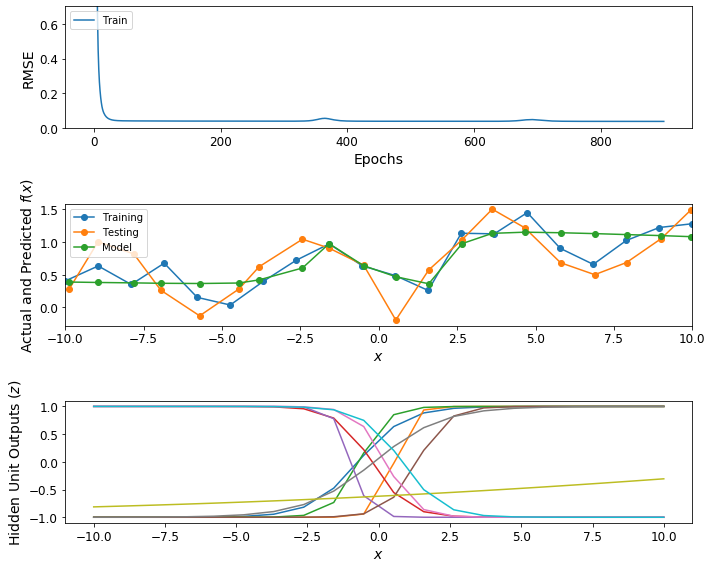

In [9]:
n_epochs = 1000

fig = plt.figure(figsize=(10,8))
    
errorTrace = []
for epoch in range(n_epochs):
    #Y = forward(model, Xtrain)
    mse, Y, Z = errorf(model, Xtrain, Ttrain)
    train(model, Xtrain, Ttrain)
    
    if epoch % 100 == 0:
        print("Epoch", epoch, "MSE =", mse)

        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(errorTrace[:epoch])
        plt.ylim(0,0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'),loc='upper left')

        plt.subplot(3,1,2)
        plt.plot(Xtrain,Ttrain,'o-',Xtest,Ttest,'o-',Xtest,Y,'o-')
        plt.xlim(-10,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')

        plt.subplot(3,1,3)
        plt.plot(Xtrain, Z)
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');

        plt.tight_layout()

        ipd.clear_output(wait=True)
        ipd.display(fig)            

    errorTrace.append(mse)


ipd.clear_output(wait=True)

train_error, _, _ = errorf(model, Xtrain, Ttrain)
test_error, _, _ = errorf(model, Xtest, Ttest)
print("Train MSE: {}".format(train_error))
print("Test MSE: {}".format(test_error))


What do you have observed? ANy notable difference did you find? As TF v2 with eager execution, the cosmetic is very similar to regular python codes. Now, let us build network with Keras APIs, which is much easier. 

# Module: tf.keras

There is a module for high level neural networks layers. 
Here are the link to the reference: https://www.tensorflow.org/api_docs/python/tf/keras. 
Following the [ML Basics with Keras](https://www.tensorflow.org/tutorials/keras/classification) tutorial will be helpful for you to practice. 

With this built-in module, we can easily stack layers to build neural networks. 

In [10]:
# with layers to build networks 
from tensorflow import keras 

ni = 1
nh = 10
no = 1
learning_rate = 0.1


# build a neural network model
model = keras.Sequential([
            keras.layers.Flatten(input_shape=[ni]),
            keras.layers.Dense(nh, activation='tanh'),
            keras.layers.Dense(no)
        ])

# compile the model
model.compile(optimizer='adam',
              loss='mse', 
              metrics=['MSE', 'MAE'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


summary() shows the neuraln network structure for you to examine the structure and the parameters. 
fit() function trains the model that you just built and returns the training information. 

In [11]:
n_epochs = 100

history = model.fit(Xtrain, Ttrain, epochs=n_epochs, validation_split=0.2)

Train on 16 samples, validate on 4 samples
Epoch 1/100
16/16 [==============================] - 2s 99ms/sample - loss: 2.5651 - MSE: 2.5651 - MAE: 1.3554 - val_loss: 0.6422 - val_MSE: 0.6422 - val_MAE: 0.7740
Epoch 2/100
16/16 [==============================] - 0s 5ms/sample - loss: 2.5279 - MSE: 2.5279 - MAE: 1.3434 - val_loss: 0.6253 - val_MSE: 0.6253 - val_MAE: 0.7631
Epoch 3/100
16/16 [==============================] - 0s 7ms/sample - loss: 2.4910 - MSE: 2.4910 - MAE: 1.3315 - val_loss: 0.6087 - val_MSE: 0.6087 - val_MAE: 0.7522
Epoch 4/100
16/16 [==============================] - 0s 7ms/sample - loss: 2.4545 - MSE: 2.4545 - MAE: 1.3195 - val_loss: 0.5923 - val_MSE: 0.5923 - val_MAE: 0.7414
Epoch 5/100
16/16 [==============================] - 0s 6ms/sample - loss: 2.4183 - MSE: 2.4183 - MAE: 1.3075 - val_loss: 0.5761 - val_MSE: 0.5761 - val_MAE: 0.7305
Epoch 6/100
16/16 [==============================] - 0s 6ms/sample - loss: 2.3824 - MSE: 2.3824 - MAE: 1.2955 - val_loss: 0.5602 - 

Epoch 51/100
16/16 [==============================] - 0s 5ms/sample - loss: 1.1457 - MSE: 1.1457 - MAE: 0.8981 - val_loss: 0.1058 - val_MSE: 0.1058 - val_MAE: 0.2613
Epoch 52/100
16/16 [==============================] - 0s 4ms/sample - loss: 1.1264 - MSE: 1.1264 - MAE: 0.8911 - val_loss: 0.1011 - val_MSE: 0.1011 - val_MAE: 0.2522
Epoch 53/100
16/16 [==============================] - 0s 5ms/sample - loss: 1.1074 - MSE: 1.1074 - MAE: 0.8841 - val_loss: 0.0965 - val_MSE: 0.0965 - val_MAE: 0.2431
Epoch 54/100
16/16 [==============================] - 0s 4ms/sample - loss: 1.0887 - MSE: 1.0887 - MAE: 0.8772 - val_loss: 0.0921 - val_MSE: 0.0921 - val_MAE: 0.2341
Epoch 55/100
16/16 [==============================] - 0s 4ms/sample - loss: 1.0704 - MSE: 1.0704 - MAE: 0.8703 - val_loss: 0.0880 - val_MSE: 0.0880 - val_MAE: 0.2252
Epoch 56/100
16/16 [==============================] - 0s 4ms/sample - loss: 1.0523 - MSE: 1.0523 - MAE: 0.8635 - val_loss: 0.0840 - val_MSE: 0.0840 - val_MAE: 0.2163
Epoc

In [12]:
history.history.keys()

dict_keys(['loss', 'MSE', 'MAE', 'val_loss', 'val_MSE', 'val_MAE'])

Text(0, 0.5, 'Actual and Predicted $f(x)$')

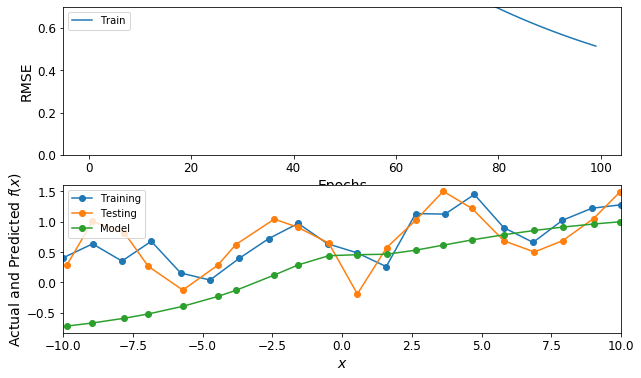

In [13]:

fig = plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(2,1,2)
plt.plot(Xtrain,Ttrain,'o-', Xtest,Ttest,'o-', Xtest, model.predict(Xtest),'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')



# Going Deeper with TF

Previous neural networks are still shallow. Now let us modify the codes to make deeper. 

In [14]:
# You can go deep by stacking the dense (full-connected) layers


ni = 1
nh1 = 3
nh2 = 3
nh3 = 3
no = 1
learning_rate = 0.1


# build a neural network model
model = keras.Sequential([
            keras.layers.Flatten(input_shape=[ni]),
            keras.layers.Dense(nh1, activation='tanh'),
            keras.layers.Dense(nh2, activation='tanh'),
            keras.layers.Dense(nh3, activation='tanh'),
            keras.layers.Dense(no)
        ])

# compile the model
model.compile(optimizer='adam',
              loss='mse', 
              metrics=['MSE', 'MAE'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


# Training Deep Nets

## Initialization

[Glorot and Bengio](http://proceedings.mlr.press/v9/glorot10a.html) discussed about how we can initialize the weights to ensure deep networks not to have the vanishing gradient problem. The basic idea of it was how to make the neural networks to have equal variance for the outputs to the inputs. Later, [He, et al.](https://arxiv.org/abs/1502.01852), also suggested an efficient initialization for the ReLU activation functions. 

Here follows the table from the text. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/nn_init.png" width=600 />

In TensorFlow, the Xavier initialization ('glorot_uniform') is default. To select a He initialization, you can use this code. 

In [15]:

# build a neural network model
model = keras.Sequential([
            keras.layers.Flatten(input_shape=[ni]),
            keras.layers.Dense(nh1, activation='tanh', kernel_initializer='he_normal'),
            keras.layers.Dense(nh2, activation='tanh', kernel_initializer='he_normal'),
            keras.layers.Dense(nh3, activation='tanh', kernel_initializer='he_normal'),
            keras.layers.Dense(no)
        ])

# compile the model
model.compile(optimizer='adam',
              loss='mse', 
              metrics=['MSE', 'MAE'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


## Activation Function

Previously, we have discussed about various choice of activation functions briefly.
In deep networks, vanishing or exploding gradient problems were in part due to a poor choice of activation function.
The s-shape curves like logistic sigmoid or tanh saturates to when inputs become very large. This can result in nearly zero derivative, which affects other layers' gradient. ReLU, the Rectifier Linear Unit, does not have any positive saturation with simple and fast gradient (0 or 1). 
However, ReLU has well-known *dying ReLU* problem that always outputs 0. Since the gradient of ReLU for negative inputs are 0, it is unlikely to be recovered when a ReLU is dead. 
Leaky ReLU suggests a solution by allowing leaks for negative inputs. That is, now you have a slope, typically 0.01, for the negatives. 
Now, let us take a look at the activation functions in the following codes.


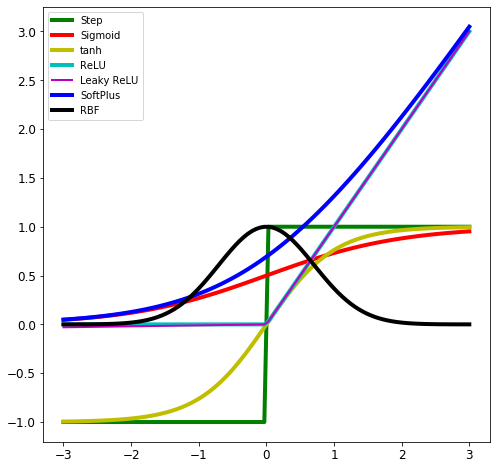

In [16]:
# Activation Functions

def step(x):
    return 1 if x > 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return x if x > 0 else 0

def leak_relu(x):
    return x if x > 0 else 0.01 * x

def softplus(x):
    return np.log(1+np.exp(x))

def gauss(x):
    return np.exp(-x**2)

COLORS=['g','r','y','c','m','b','k']
LABELS=['Step','Sigmoid','tanh','ReLU','Leaky ReLU','SoftPlus','RBF']
x = np.linspace(-3, 3, 100)

plt.figure(figsize=(8,8))
for i, f in enumerate([step, sigmoid, tanh, relu, leak_relu, softplus, gauss]):
     plt.plot(x, list(map(f,x)), color=COLORS[i], linewidth=4 if i!=4 else 2, label=LABELS[i])

plt.legend()

Our text discuss more choices that extends ReLU, including ELU (Exponential Linear Unit). This has been improved training time and better performance on the test data. 

$$
ELU_\alpha (z) = \begin{cases}
    \alpha( \exp(z) - 1)      & \quad \text{if } z < 0\\
    z  & \quad \text{if } z \ge 0
  \end{cases}
$$

The negative outputs for negative inputs help a hidden unit to produce outputs centered to zero. This helps speed up learning. Also, similar to Leaky ReLU, the nonzero gradient for negetive inputs avoids the dying ReLU. 

In [17]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

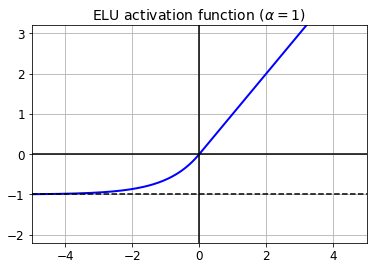

In [18]:
z = np.linspace(-5, 5, 200)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

### SELU

This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017 (I will definitely add it to the book). It outperforms the other activation functions very significantly for deep neural networks, so you should really try it out.

According to the author of our text, this activation function preserves the mean 0 and standard deviation 1 across all layers of neural networks with 100 layers. That is amzaing! 

In [19]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

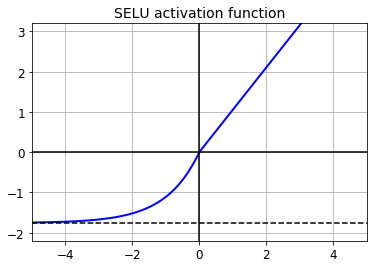

In [20]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

Now, let us try this in TensorFlow. 

In [21]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))



In [22]:
# to use SELU activation, you just need to create the dense layer with activation parameter!
# bypassing the custom function
keras.layers.Dense(nh1, activation=selu)  


Or, you can use the preset activation functions. The list of builtin activation functions are available from https://www.tensorflow.org/api_docs/python/tf/keras/activations. 

In [23]:
keras.layers.Dense(nh1, activation='selu')  

# Example: MNIST Hand-written Digit Classification

Let us apply the deep neural networks to MNIST data, which is builtin tensorflow library. 

In [24]:
# MNIST Example

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

35689


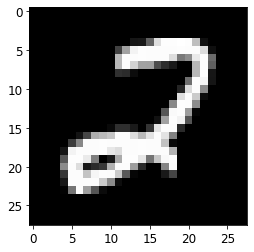

In [25]:
randidx = np.random.randint(x_train.shape[0])
print(randidx)
plt.imshow(x_train[randidx].reshape((28,28)), cmap='gray')

In [26]:
# Building a network
tf.keras.backend.set_floatx('float64')

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.0084 - accuracy: 0.9975
Epoch 2/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0079 - accuracy: 0.9974
Epoch 3/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0058 - accuracy: 0.9983
Epoch 4/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0074 - accuracy: 0.9974
Epoch 5/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0038 - accuracy: 0.9989
Epoch 6/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.0067 - accuracy: 0.9980
Epoch 7/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.0050 - accuracy: 0.9985
Epoch 8/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0057 - accuracy: 0.9981
Epoch 9/10
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0034 - accuracy: 0.9

## Batch Normalization

[Ioffe and Szegedy](https://arxiv.org/pdf/1502.03167.pdf) proposed a batch normalization technique to avoid the vanishing gradient problem. Unlike the standard normalization, it has minibatch normalization on each layer. 
That is, before applying an activation function, it applies normalization of the data, centering to zero and normalizing, scaling and shifting the inputs. 

Here follows the codes for it.

In [29]:
def build_model():
    model = keras.Sequential([
                keras.layers.Flatten(input_shape=(28, 28)),
                keras.layers.BatchNormalization(),
                keras.layers.Dense(128, activation='relu'),
                keras.layers.BatchNormalization(),    
                keras.layers.Dense(10)
            ])
    return model

In [30]:
model = build_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 105,418
Trainable params: 103,594
Non-trainable params: 1,824
_________________________________________________________________


Borrowing the codes from the text, we can have the batch normalized version as below:

In [31]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 371us/sample - loss: 0.2348 - accuracy: 0.9302
Epoch 2/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.1162 - accuracy: 0.9650
Epoch 3/10
60000/60000 [==============================] - 21s 349us/sample - loss: 0.0892 - accuracy: 0.9718
Epoch 4/10
60000/60000 [==============================] - 23s 381us/sample - loss: 0.0717 - accuracy: 0.9772
Epoch 5/10
60000/60000 [==============================] - 21s 353us/sample - loss: 0.0636 - accuracy: 0.9787
Epoch 6/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0531 - accuracy: 0.9823
Epoch 7/10
60000/60000 [==============================] - 21s 345us/sample - loss: 0.0448 - accuracy: 0.9852
Epoch 8/10
60000/60000 [==============================] - 21s 348us/sample - loss: 0.0434 - accuracy: 0.9861
Epoch 9/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0400 - accuracy: 0.9

# Reusing Pretrained Layers! 

Often, the training deep network requires a fair amount of time. For similar problems, instead of training a very large deep network from scratch, you can always reuse old networks for similar problems as the figure below: 
<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/nn_reuse.png" width=600 />


First, we store checkpoints during training by using ModelCheckpoint callback. 

In [32]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 period=5) # every 10 epoch

# Train the model with the new callback
model.fit(x_train, 
          y_train,  
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 476us/sample - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.1239 - val_accuracy: 0.9754
Epoch 2/10
60000/60000 [==============================] - 24s 406us/sample - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.1328 - val_accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 24s 408us/sample - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.1402 - val_accuracy: 0.9741
Epoch 4/10
60000/60000 [==============================] - 24s 392us/sample - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.1282 - val_accuracy: 0.9769
Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9910
Epoch 00005: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 24s 407us/sample - loss: 0.0259 - accuracy: 0.9910 - val_loss: 0.1272 - val_accuracy: 0.9756
Epoch 6/10
60000/60000 [==============================] - 

Now, we can load from the checkpoint to load the pre-trained model to be reused. 

In [35]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [36]:
model = build_model() 

model.load_weights(latest)

You can manually save weights with save_weights or save_model APIs. Please refer the [tutorial page](https://www.tensorflow.org/tutorials/keras/save_and_load). 

## More tricks...

There are far more tricks are disucssed in our text. Please download the python notebook from the GitHub, practice them by yourself. 


# Regularization

We have discussed about some regularization techniques such as early stopping, regularization, adding noises, and so on. For neural networks, you can consider dropout that turns some hidden nodes with dropout rate (usually 50%) for training. It has successfully generated better model in many practical applications. So you can consider add a line for tf.layers.dropout() call.  

In [37]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.BatchNormalization(), 
            keras.layers.Dropout(0.2),   ### 0.2 of input units to drop
            keras.layers.Dense(10)
        ])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 105,418
Trainable params: 103,594
Non-trainable params: 1,824
____________________________________________